In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rc('figure', figsize=(12,9))
mpl.rc('font', size=20.)
mpl.rc('font', family='serif')
mpl.rc('text', usetex=True)
mpl.rc('axes', color_cycle=['k','b','g','r','yellow'])

import pyGadget

In [2]:
linestyle = ['-', '-', '-', '-', '-']
name = ['J = 0', 'J = J$_0$', 'J = 10 J$_0$', 'J = 100 J$_0$', 'J = 1000 J$_0$']
view = [('x', 0.29518), ('z', 0.825), ('x',np.pi/2)]

In [3]:
sim = pyGadget.sim.Simulation('stampede/vanilla', track_sinks=True)

No sink specified: Selecting first sink to form...
Key set: nform = 1
Using sink ID 3103667
Found sinkfiles.  Loading sinkdata.
Key set: nform = 2
Using sink ID 3975878


In [4]:
halo = pyGadget.halo.Halo(sim)
disk = pyGadget.sink.AccretionDisk(sim, sim.sink1)

# Compare v_rot particle by particle to stored average

In [9]:
n = 615
snap = sim.load_snapshot(n)
xyz = snap.gas.get_coords('AU')
vxyz = snap.gas.get_velocities('kms')
snap.update_sink_frame_ofR(xyz, vxyz)
#sink = snap.sinks[0]

#sinkpos = (sink.x, sink.y, sink.z)
#sinkvel = (sink.vx, sink.vy, sink.vz)
sinkvel = (0., 0., 0.)
pos = snap.gas.get_coords(system='spherical', centering='avg', vcenter=sinkvel, view=view)
vel = snap.gas.get_velocities(system='spherical')
xyz = snap.gas.get_coords(system='cartesian')
vxyz = snap.gas.get_velocities(system='cartesian')
dens = snap.gas.get_number_density('cgs')
mass = snap.gas.get_masses('solar')
snap.update_sink_frame_ofR(xyz, vxyz)

Turning on gas particle refinement.
There are 7999128 highest resolution particles.
Tracking sinks.
1 sinks found.
Center averaged over 10 particles
Center averaged over all particles with density greater than 1.00e+11 particles/cc
Density averaged box center: 5.694e+08 5.686e+08 5.615e+08


In [18]:
a = 'radius'
b = 'total_mass'
c = 'vrot'
disk.load(n, a,b,c)
x,v = pyGadget.analyze.data_slice(dens > 1e6, pos,vel)
gdata = np.genfromtxt('../../../data/otherPeoplesWork/Greif_et_al_2012/f1vrot.csv',
                      delimiter=',')
grau = gdata[:,0]
gvrot = gdata[:,1]

rau = disk.data[:,0]
m = disk.data[:,1]*1.989e33
vrot = disk.data[:,2]
rcm = rau * 1.49597871e13
OmegaK = np.sqrt(pyGadget.constants.GRAVITY * m / rcm**3)
vK = OmegaK * rcm /1e5

"SELECT radius, total_mass, vrot FROM snapshot0615"


In [19]:
menc = np.zeros_like(rau)
for i,r in enumerate(rau):
    menc[i] = pyGadget.analyze.data_slice(pos[:,0] < r, mass)[0].sum()
venc = np.sqrt(pyGadget.constants.GRAVITY * menc*1.989e33 / rcm) / 1e5

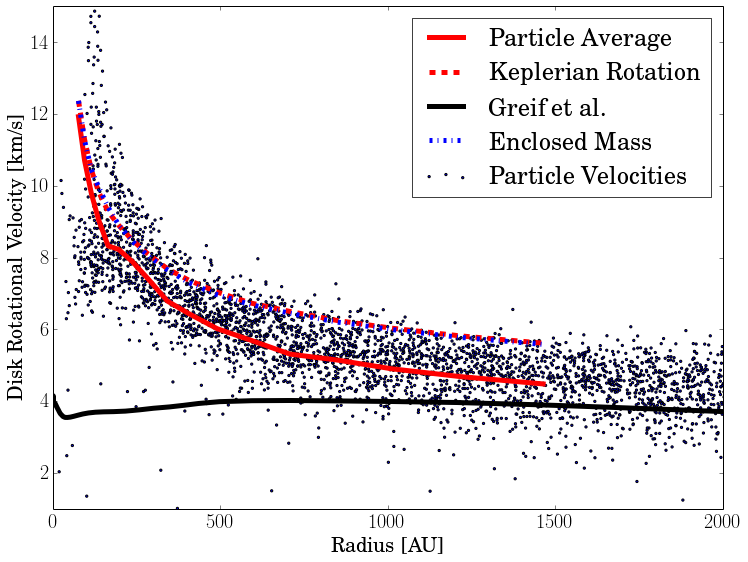

In [22]:
color = 'r'
lw = 5

#rth = 1.49597871e15 #100 AU
#mth = 13.6 * 1.989e33 # Central Mass of 13.6 M_sun
#vth = np.sqrt(6.67e-8 * mth / rth) / 1e5 # Expected orbital velocity [km/s] at 100 AU from 13.6 M_sun object

plt.scatter(x[:,0], v[:,2], s=5, label='Particle Velocities')
plt.plot(rau, vrot, c=color, ls='-', lw=lw, label='Particle Average')
plt.plot(rau, vK, c=color, ls='--', lw=lw, label='Keplerian Rotation')
plt.plot(grau, gvrot, c='k', ls='-', lw=lw, label='Greif et al.')
plt.plot(rau, venc, c='b', ls='-.', lw=lw, label='Enclosed Mass')
#plt.semilogx()

plt.xlim(1,2e3)
plt.ylim(1,15)
l = plt.legend()
l.get_frame().set_alpha(0.75)
plt.xlabel('Radius [AU]')
plt.ylabel('Disk Rotational Velocity [km/s]')
plt.savefig('figures/vrot_comparison_{}.png'.format(n), bbox_inches='tight')
plt.show()